In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
import glob
import cv2
import shutil
from keras import backend as K

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, Conv2DTranspose, GaussianNoise, Reshape, MaxPooling2D
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.
C:\Users\peravit2\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\peravit2\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\peravit2\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\peravit2\Anaconda3\lib\site-packages\tensorflow\python\framewo

In [20]:
root=r'C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\bird_img'
for path, subdirs, files in os.walk(root):
    for name in files:
        if name.startswith(("._")):
            os.remove(os.path.join(path, name))
            print (os.path.join(path, name))

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\001.Black_footed_Albatross\._Black_footed_Albatross_0001_2950163169.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\001.Black_footed_Albatross\._Black_footed_Albatross_0002_2293084168.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\001.Black_footed_Albatross\._Black_footed_Albatross_0003_2981373810.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\001.Black_footed_Albatross\._Black_footed_Albatross_0004_2731401028.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\001.Black_footed_Albatross\._Black_footed_Albatross_0005_2755588934.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\001.Black_footed_Albatross\._Black_footed_Albatross_0006_2928372528.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\001.Black_footed_Albatross\._Black_footed_Albatross_0007_2675126617.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\001.Black_footed_Albatross\._Black_foote

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\021.Eastern_Towhee\._Eastern_Towhee_0017_2187908406.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\021.Eastern_Towhee\._Eastern_Towhee_0018_120628317.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\021.Eastern_Towhee\._Eastern_Towhee_0019_2601828200.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\021.Eastern_Towhee\._Eastern_Towhee_0020_2599674379.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\021.Eastern_Towhee\._Eastern_Towhee_0021_2923789659.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\021.Eastern_Towhee\._Eastern_Towhee_0022_451267358.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\021.Eastern_Towhee\._Eastern_Towhee_0023_2386066089.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\021.Eastern_Towhee\._Eastern_Towhee_0024_2545961689.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\021.Eastern_Towhee\._Eastern_Towhee_0025_

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\041.Scissor_tailed_Flycatcher\._Scissor_tailed_Flycatcher_0027_483307090.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\041.Scissor_tailed_Flycatcher\._Scissor_tailed_Flycatcher_0028_2481341399.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\041.Scissor_tailed_Flycatcher\._Scissor_tailed_Flycatcher_0029_2773661334.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\041.Scissor_tailed_Flycatcher\._Scissor_tailed_Flycatcher_0030_469570951.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\041.Scissor_tailed_Flycatcher\._Scissor_tailed_Flycatcher_0031_536647403.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\041.Scissor_tailed_Flycatcher\._Scissor_tailed_Flycatcher_0032_156554700.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\041.Scissor_tailed_Flycatcher\._Scissor_tailed_Flycatcher_0033_2182406758.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\04

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\066.Western_Gull\._Western_Gull_0001_2655094973.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\066.Western_Gull\._Western_Gull_0002_259335622.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\066.Western_Gull\._Western_Gull_0003_299142476.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\066.Western_Gull\._Western_Gull_0004_2114939911.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\066.Western_Gull\._Western_Gull_0005_1073431448.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\066.Western_Gull\._Western_Gull_0006_284283384.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\066.Western_Gull\._Western_Gull_0007_516664187.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\066.Western_Gull\._Western_Gull_0008_317848123.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\066.Western_Gull\._Western_Gull_0009_1723980724.jpg
C:\Users\peravit2\Deskto

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\084.Red_legged_Kittiwake\._Red_legged_Kittiwake_0020_1940664901.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\084.Red_legged_Kittiwake\._Red_legged_Kittiwake_0021_1509219073.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\084.Red_legged_Kittiwake\._Red_legged_Kittiwake_0022_2743730128.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\085.Horned_Lark\._Horned_Lark_0001_2261794849.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\085.Horned_Lark\._Horned_Lark_0002_2398211488.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\085.Horned_Lark\._Horned_Lark_0003_3023719368.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\085.Horned_Lark\._Horned_Lark_0004_2330272437.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\085.Horned_Lark\._Horned_Lark_0005_134624134.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\085.Horned_Lark\._Horned_Lark_0006

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\097.Orchard_Oriole\._Orchard_Oriole_0028_2481603085.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\097.Orchard_Oriole\._Orchard_Oriole_0029_338933477.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\097.Orchard_Oriole\._Orchard_Oriole_0030_1420273185.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\097.Orchard_Oriole\._Orchard_Oriole_0031_2432980950.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\097.Orchard_Oriole\._Orchard_Oriole_0032_2561716164.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\097.Orchard_Oriole\._Orchard_Oriole_0033_2486541642.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\097.Orchard_Oriole\._Orchard_Oriole_0034_2244771004.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\098.Scott_Oriole\._Scott_Oriole_0001_2216522733.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\098.Scott_Oriole\._Scott_Oriole_0002_2424594

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\115.Brewer_Sparrow\._Brewer_Sparrow_0034_481922205.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\116.Chipping_Sparrow\._Chipping_Sparrow_0001_226687764.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\116.Chipping_Sparrow\._Chipping_Sparrow_0002_493493236.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\116.Chipping_Sparrow\._Chipping_Sparrow_0003_2537948838.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\116.Chipping_Sparrow\._Chipping_Sparrow_0004_2408400216.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\116.Chipping_Sparrow\._Chipping_Sparrow_0005_448526175.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\116.Chipping_Sparrow\._Chipping_Sparrow_0006_3075226789.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\116.Chipping_Sparrow\._Chipping_Sparrow_0007_2407562927.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\116.Chipping_Sp

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\133.White_throated_Sparrow\._White_throated_Sparrow_0030_153904817.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\133.White_throated_Sparrow\._White_throated_Sparrow_0031_2317406640.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\133.White_throated_Sparrow\._White_throated_Sparrow_0032_2059696089.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\133.White_throated_Sparrow\._White_throated_Sparrow_0033_2432665669.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\133.White_throated_Sparrow\._White_throated_Sparrow_0034_2480891035.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\133.White_throated_Sparrow\._White_throated_Sparrow_0035_2462905996.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\134.Cape_Glossy_Starling\._Cape_Glossy_Starling_0001_2946382397.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\134.Cape_Glossy_Starling\._Cape_Glossy_Starli

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\153.Philadelphia_Vireo\._Philadelphia_Vireo_0001_1386850614.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\153.Philadelphia_Vireo\._Philadelphia_Vireo_0002_59215684.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\153.Philadelphia_Vireo\._Philadelphia_Vireo_0003_2997535711.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\153.Philadelphia_Vireo\._Philadelphia_Vireo_0004_3018490634.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\153.Philadelphia_Vireo\._Philadelphia_Vireo_0005_2998376982.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\153.Philadelphia_Vireo\._Philadelphia_Vireo_0006_2997535791.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\153.Philadelphia_Vireo\._Philadelphia_Vireo_0007_2998376900.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\153.Philadelphia_Vireo\._Philadelphia_Vireo_0008_2536401505.jpg
C:\Users\peravit2\Desktop\BADS7604

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\170.Mourning_Warbler\._Mourning_Warbler_0017_2497552546.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\170.Mourning_Warbler\._Mourning_Warbler_0018_392495285.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\170.Mourning_Warbler\._Mourning_Warbler_0019_2523030398.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\170.Mourning_Warbler\._Mourning_Warbler_0020_2522208525.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\170.Mourning_Warbler\._Mourning_Warbler_0021_2496732667.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\170.Mourning_Warbler\._Mourning_Warbler_0022_2522207631.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\170.Mourning_Warbler\._Mourning_Warbler_0023_343485567.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\170.Mourning_Warbler\._Mourning_Warbler_0024_xxx.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\170.Mourning_War

C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\187.American_Three_toed_Woodpecker\._American_Three_toed_Woodpecker_0011_2599789306.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\187.American_Three_toed_Woodpecker\._American_Three_toed_Woodpecker_0012_171736741.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\187.American_Three_toed_Woodpecker\._American_Three_toed_Woodpecker_0013_217133082.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\187.American_Three_toed_Woodpecker\._American_Three_toed_Woodpecker_0014_2599270284.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\187.American_Three_toed_Woodpecker\._American_Three_toed_Woodpecker_0015_2250020890.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\187.American_Three_toed_Woodpecker\._American_Three_toed_Woodpecker_0016_2250022414.jpg
C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\images\187.American_Three_toed_Woodpecker\._American_Three_toed_Woodpecker_0017_22

In [58]:
root = r'C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\bird_img'
try:
    for path, subdirs, files in os.walk(root):
        for name in files:
            shutil.move(os.path.join(path,name), r"C:\Users\peravit2\Desktop\BADS7604 DL\Aj.thitirat\bird_img\bird")
except :
    print("File already exists again ? whatever")

File already exists again ? whatever


In [2]:
img_size = 128
path = 'bird_img/bird/'
file_name = os.listdir(path)

l_img = []

for i in file_name:
    p = path + i
    
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size,img_size))
    
    l_img.append(img)

x_train = np.asarray(l_img)
x_train = x_train.astype( np.float32 )
x_train /= 255.

x_train.shape

(6033, 128, 128, 3)

In [3]:
from tensorflow.keras import backend as K
# Codes from https://keras.io/examples/variational_autoencoder/
# Reparameterization trick: instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling( args ):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    """
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    
    # By default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal( shape=(batch, dim) )  # shape = the shape of tensor to create
    
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Conv2DTranspose, GaussianNoise, Reshape, MaxPooling2D

#### 1. Input  ####
in_img = Input( shape=(img_size,img_size,3) , name='input_img')
#x = Dropout(0.2, name='denoised_img')(in_img)       # denoising AE
x = in_img

#### 2. Encode ####
x = Conv2D( 64, (3,3), activation='relu',padding='same', strides=(2,2), name='encoded1')(x)
# x = Dropout(0.2)(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D( 128, (3,3), activation='relu', padding='same', strides=(2,2),name='encoded2')(x)
# x = Dropout(0.2)(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)

# x = Conv2D( 256, (3,3), activation='relu', padding='same', strides=(2,2),name='encoded3')(x)
# # x = MaxPooling2D(pool_size=(2, 2))(x)

# x = Conv2D( 512, (3,3), activation='relu', padding='same', strides=(2,2),name='encoded4')(x)
# # x = Dropout(0.5)(x)
# # x = MaxPooling2D(pool_size=(2, 2))(x)

# x = Conv2D( 4, (3,3), activation='relu', padding='same', strides=(2,2),name='encoded5')(x)

x = Flatten()(x)
# x = Dense(512, activation='relu')(x)

## Bottleneck
latent_dim = 64
z_mean = Dense( latent_dim, name='z_mean' )(x)
z_log_var = Dense( latent_dim, name='z_log_var' )(x)

# 4. Use reparameterization trick to push the sampling out as input
z = Lambda( sampling,   # name of the function to be evaluated
                    output_shape=(latent_dim,), 
                    name='z' )( [z_mean, z_log_var] )

# Instantiate the encoder model
# 1 input is in_img
# 3 outputs include z_mean (vector of mean), z_log_var (vector of SD), z (vector of sampled points)
encoder = Model( in_img, [z_mean, z_log_var, z], name='encoder' )
encoder.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
encoded1 (Conv2D)               (None, 64, 64, 64)   1792        input_img[0][0]                  
__________________________________________________________________________________________________
encoded2 (Conv2D)               (None, 32, 32, 128)  73856       encoded1[0][0]                   
__________________________________________________________________________________________________
flatten (Flatten)               (None, 131072)       0           encoded2

In [5]:
#### 5. Decoder ####
latent_inputs = Input( shape=(latent_dim,), name='z_sampling' )
x = Dense( 32*32*128 , activation='relu')(latent_inputs)
x = Reshape( (32,32,128) )(x) 
# x = Conv2DTranspose( 256, (3,3), activation='relu', padding='same', strides=2, name='decoded1')(x)

# x = Conv2DTranspose( 128, (3,3), activation='relu', padding='same', strides=2, name='decoded2')(x)

x = Conv2DTranspose( 64, (3,3), activation='relu', padding='same', strides=2, name='decoded3')(x)
# x = Conv2DTranspose( 32, (3,3), activation='relu', padding='same', strides=2, name='decoded4')(x)
out_img = Conv2DTranspose( 3, (3,3), activation='sigmoid', padding='same', strides=2, name='decoded5')(x)

#x = Dropout(0.2)(x)

#### 6. Output ####
#out_img = Conv2DTranspose( 3, (3,3), activation='sigmoid', padding='same', name='output_img')(x)

# Instantiate the encoder model
decoder = Model( latent_inputs, out_img, name='decoder' )
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 131072)            8519680   
_________________________________________________________________
reshape (Reshape)            (None, 32, 32, 128)       0         
_________________________________________________________________
decoded3 (Conv2DTranspose)   (None, 64, 64, 64)        73792     
_________________________________________________________________
decoded5 (Conv2DTranspose)   (None, 128, 128, 3)       1731      
Total params: 8,595,203
Trainable params: 8,595,203
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Among the three outputs of 'encoder', send only the last one (= 'z') to 'decoder'
vae_out = decoder( encoder(in_img)[2] )

# Instantiate VAE model
model = Model( in_img, vae_out, name='vae_mlp' )

model.summary()

Model: "vae_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_img (InputLayer)       [(None, 128, 128, 3)]     0         
_________________________________________________________________
encoder (Model)              [(None, 64), (None, 64),  16852992  
_________________________________________________________________
decoder (Model)              (None, 128, 128, 3)       8595203   
Total params: 25,448,195
Trainable params: 25,448,195
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.losses import mse, binary_crossentropy
def vae_loss ( y_true, y_pred ):
    # Original reconstruction loss: two options
    # recon_loss = mse( y_true, y_pred )
    recon_loss = binary_crossentropy( y_true, y_pred )
    recon_loss *= img_size*img_size*3
    
    # Extract two output vectors from the 'encoder'
    z_mean = model.get_layer('encoder').get_layer('z_mean').output
    z_log_var = model.get_layer('encoder').get_layer('z_log_var').output
    
    # KL divergence loss
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum( kl_loss, axis=-1 )
    kl_loss *= -0.5
    
    return K.mean( recon_loss + kl_loss )

# Compile the model
model.compile( optimizer='adam', loss=vae_loss, metrics=["acc"] )

In [9]:
hist = model.fit( x_train, x_train, batch_size=1, epochs=21)
# hist = model.fit( x_train, x_train, batch_size=1, epochs=5,validation_data=[x_test, x_test])

Epoch 1/21
6033/6033 [==============================] - 117s 19ms/sample - loss: 31455.7816 - acc: 0.3699 - loss: 31477.9917 - a - ETA: 1s - loss:
Epoch 2/21
6033/6033 [==============================] - 115s 19ms/sample - loss: 30352.4292 - acc: 0.4247 - loss: 3 - ETA: 2s - loss: 30360.6333 - acc:  - ETA: 2s 
Epoch 3/21
6033/6033 [==============================] - 113s 19ms/sample - loss: 29897.6334 - acc: 0.5077 - loss: 29901 - ETA: 0s - loss: 29900.4914 -
Epoch 4/21
6033/6033 [==============================] - 111s 18ms/sample - loss: 29755.9146 - acc: 0.5205 - loss: 29751.67 - ETA: 0s - loss: 29758.806
Epoch 5/21
6033/6033 [==============================] - 111s 18ms/sample - loss: 29658.6018 - acc: 0.5312 - loss: 29664.9564 - ac - ETA: 4s - loss:  - E
Epoch 6/21
6033/6033 [==============================] - 111s 18ms/sample - loss: 29577.1438 - acc: 0.5354 - loss: 29574  - ETA: 0s - loss: 29578.7833 - acc: 0.53
Epoch 7/21
6033/6033 [==============================] - 111s 18ms/sample

In [2]:
model.save('vae1.h5')

NameError: name 'model' is not defined

dict_keys(['loss', 'acc'])


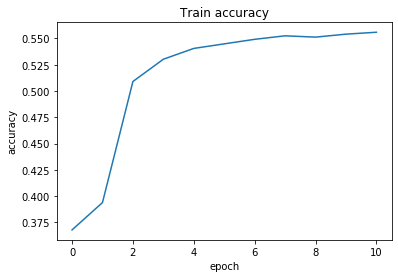

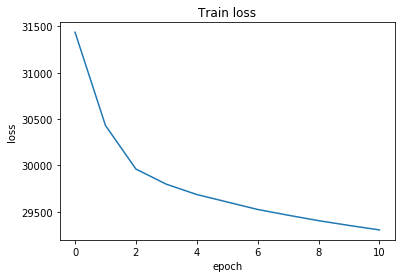

In [10]:
# List all data in history
print( hist.history.keys())
# Summarize history for accuracy
plt.plot(hist.history['acc'])
#plt.plot(hist.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

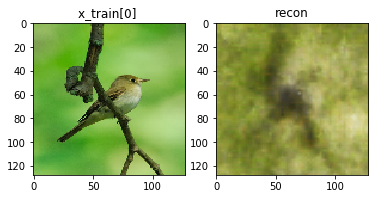

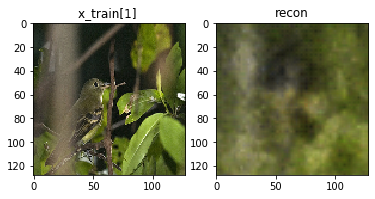

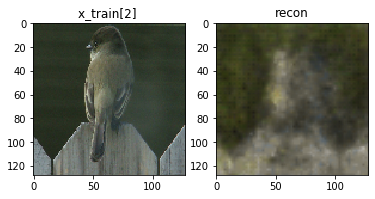

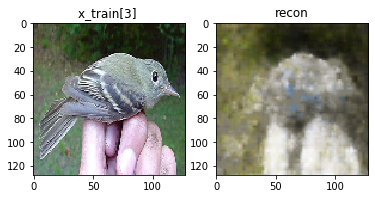

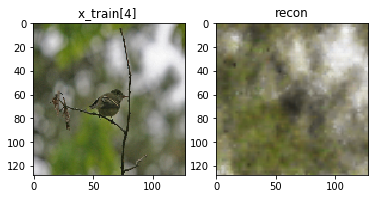

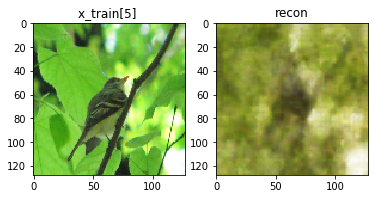

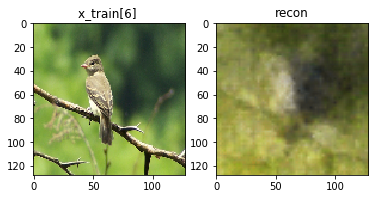

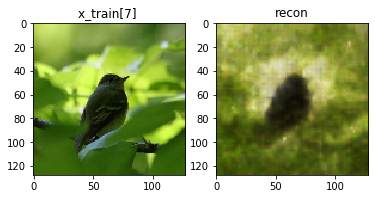

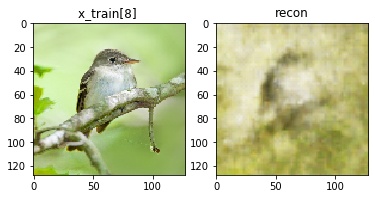

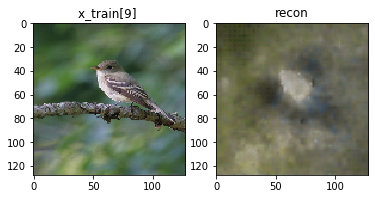

In [11]:
n = 10
for i in range(n):
    x_recon = model.predict( np.array ( [x_train[i] ] ) )

    plt.subplot(1,2,1).set_title( 'x_train[' + str(i) +'] ')            
    plt.imshow( x_train[i].reshape(img_size,img_size,3) )
    
    plt.subplot(1,2,2).set_title( 'recon' )               
    plt.imshow( x_recon.reshape(img_size,img_size,3)  )  
    
    plt.show()

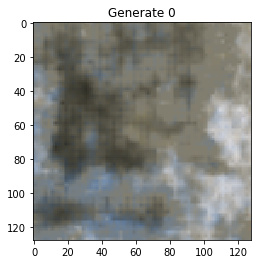

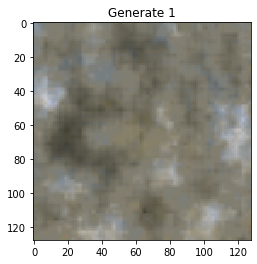

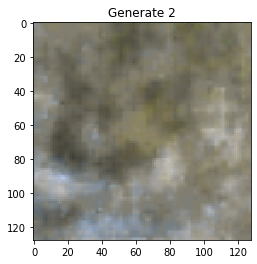

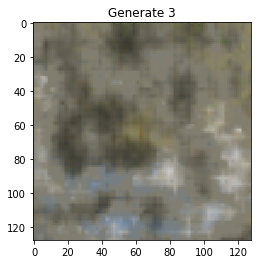

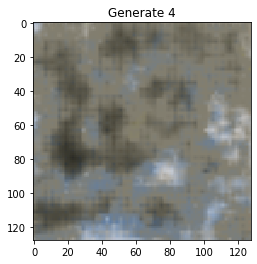

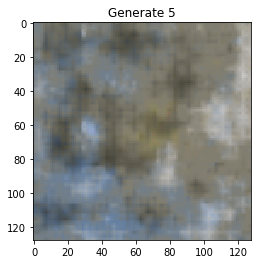

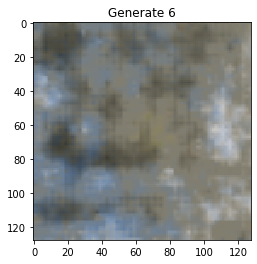

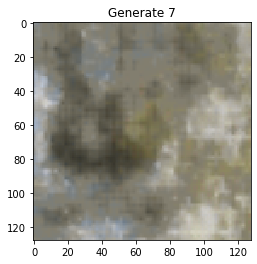

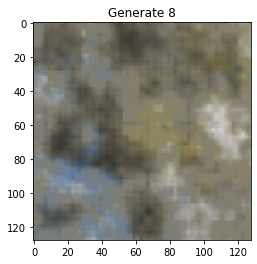

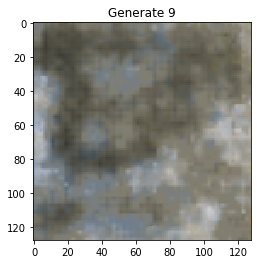

In [12]:
n = 10
for i in range(n):
    z = np.random.randint(1000, size=(1,latent_dim ))/1000
    x_decoded = decoder.predict( z )

    plt.title( "Generate {}".format(i) )
    plt.imshow( x_decoded.reshape(img_size,img_size,3)  )  
    
    plt.show()